#**Predicting the survival of Titanic Passengers** 

### **Importing the libraries**

In [ ]:
# Linear Algebra
import numpy as np 

# Data Processing
import pandas as pd 
from sklearn import preprocessing

# Data Visualization
import seaborn as sns

# ML Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV

### **Getting the data**

In [ ]:
train_df = pd.read_csv("./titanic/train.csv")
test_df = pd.read_csv("./titanic/test.csv")

FileNotFoundError: ignored

###**Data Exploration**

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




*  We have 12 Columns
*  Age in a float and not integer
*  Cabin has null values
*  Embarked has 2 null values




In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*   Ages range from 0.42 to 80
*   38% of the passengers survived
*   177 missing values in Age

In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

We can brainstorm that what all features could be a good predictor of Survival, but let's see what the data reveals!

### **Age**

Destructure the data 

In [ ]:
female = train_df[train_df['Sex']=='female']
male = train_df[train_df['Sex']=='male']

Females Plot

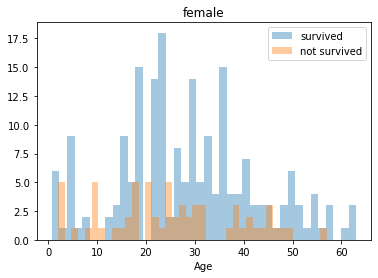

In [ ]:
ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=40, label = 'survived', kde =False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label = 'not survived', kde =False)
_ = ax.set_title('female')
ax.legend()

Males Plot

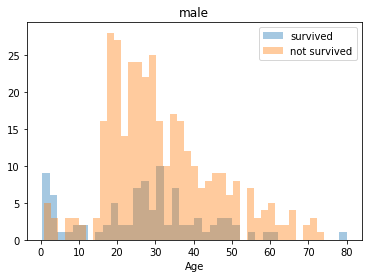

In [ ]:
ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=40, label = 'survived', kde =False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label = 'not survived', kde =False)
_ = ax.set_title('male')
ax.legend()

### **Embarked**

In [ ]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
EmbS = train_df[train_df['Embarked']=='S']
EmbC = train_df[train_df['Embarked']=='C']
EmbQ = train_df[train_df['Embarked']=='Q']

In [ ]:
print('Probability of Survival of S -', EmbS[EmbS['Survived']==1].shape[0]/644)
print('Probability of Survival of C -',EmbC[EmbC['Survived']==1].shape[0]/168)
print('Probability of Survival of Q -',EmbQ[EmbQ['Survived']==1].shape[0]/77)

Probability of Survival of S - 0.33695652173913043
Probability of Survival of C - 0.5535714285714286
Probability of Survival of Q - 0.38961038961038963


C Embarkment has a higher probability of survival amongst the 3

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


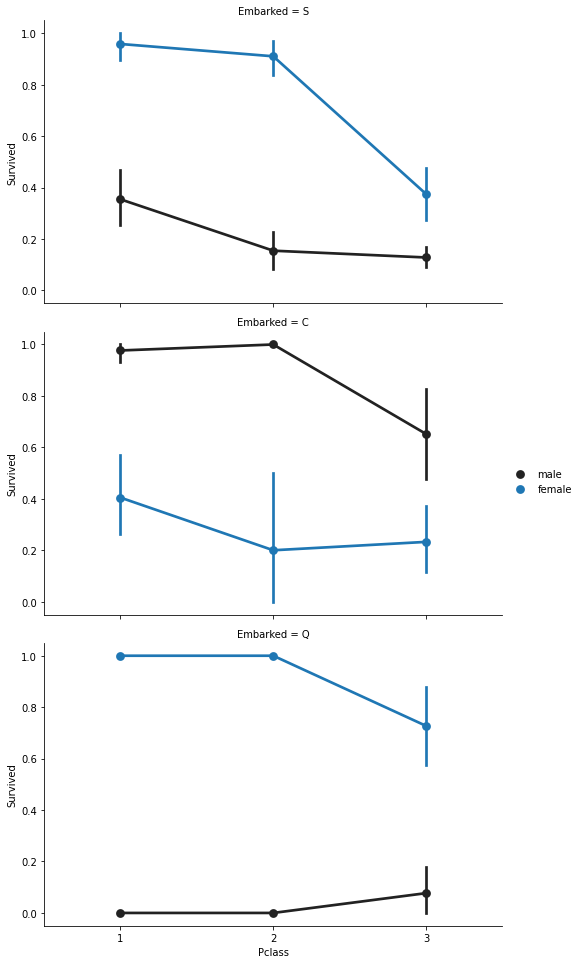

In [ ]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

### **Pclass**

In [ ]:
train_df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


A Person with a PClass of 1 has a high probability of surviving whereas a person of Pclass 2 has a very low chance of surviving

## **Data Preprocessing**

Dropping PassengerId feature as it has no significance in prediction of survival

In [ ]:
train_df = train_df[['Pclass','Sex','Age','Fare','Embarked','Survived']]

In [ ]:
train_df.Age.agg(['max','min','mean','median'])

max       80.000000
min        0.420000
mean      29.699118
median    28.000000
Name: Age, dtype: float64

In [ ]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train_df.fillna({'Age': train_df.Age.mean(),
           'Embarked': 'S'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
newFeatures = pd.get_dummies(train_df[['Sex','Embarked']])

In [ ]:
newFeatures.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [ ]:
objFeatures = train_df.select_dtypes(exclude=['object'])

In [ ]:
objFeatures.head()

,Pclass,Age,Fare,Survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [ ]:
train_df = pd.concat((newFeatures,objFeatures),axis=1)

In [ ]:
train_df.isnull().sum()

Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass        0
Age           0
Fare          0
Survived      0
dtype: int64

In [ ]:
train_df.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,Fare,Survived
0,0,1,0,0,1,1.0,0.271174,0.014151,0
1,1,0,1,0,0,0.0,0.472229,0.139136,1
2,1,0,0,0,1,1.0,0.321438,0.015469,1
3,1,0,0,0,1,0.0,0.434531,0.103644,1
4,0,1,0,0,1,1.0,0.434531,0.015713,0


In [ ]:
train_df.shape

(891, 9)

In [ ]:
scaler = preprocessing.MinMaxScaler(copy = False)
train_df[['Age','Fare','Pclass']] = scaler.fit_transform(train_df[['Age','Fare','Pclass']])

In [ ]:
X = train_df.drop("Survived", axis=1)
print(X.shape)
y = train_df["Survived"]
print(y.shape)

(891, 8)
(891,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## **Prediction** 

### ***Random Forest***

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
grid = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
random_forest_cv = GridSearchCV(random_forest, grid, cv= 5)
random_forest_cv.fit(X_train, y_train)
print(random_forest_cv.best_params_)
print(random_forest_cv.best_score_)
random_forest.fit(X_train, y_train)

print(random_forest_cv.score(X_test, y_test))

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}
0.8221568627450981
0.8406779661016949


### ***Logistic Regression***

In [ ]:
logreg = LogisticRegression()
grid={"C":np.logspace(-3,3,7)}

logreg_cv= GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

print(logreg_cv.score(X_test,y_test))

{'C': 0.01}
0.7919187675070027
0.8406779661016949


### ***K Nearest Neighbor***

In [ ]:
knn =  KNeighborsClassifier()
grid={'n_neighbors':[3,4,5,6,7,8,9,10,11,12]}

knn_cv= GridSearchCV(knn,grid,cv=5)
knn_cv.fit(X_train,y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

print(knn_cv.score(X_test,y_test))

{'n_neighbors': 8}
0.8003081232492997
0.8338983050847457


### ***Decision Tree***

In [ ]:
decision_tree = DecisionTreeClassifier() 
grid = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best','random'],
    'max_depth' : [3,4,5,6,7,8]
    }

decision_tree_cv= GridSearchCV(decision_tree,grid,cv=10)
decision_tree_cv.fit(X_train,y_train)

print(decision_tree_cv.best_params_)
print(decision_tree_cv.best_score_)

print(decision_tree_cv.score(X_test,y_test))


{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
0.8070338983050848
0.8372881355932204
